In [1]:
import os
import pdb
import json
import random
from IPython.display import display, Image

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def read_file(path, i=None):
    if 'metadata.jsonl' in path:
        data = open(path, 'r').readlines()[0]
        data = json.loads(data)['prompt']
    else:
        data = open(path, 'r').readlines()
    return data


In [4]:
def return_ordered_results(path):
    results = open(path, 'r').readlines()
    results = [json.loads(r) for r in results]
    new_results = {}
    for r in results:
        index = r['filename'].index('/samples/')
        image_id = int(r['filename'][index-5:index])
        new_results[image_id] = (r['correct'], r['reason'])
    return new_results

rewrite_results = return_ordered_results("outputs_without_thinking_1_sample/results.jsonl")
thinking_results = return_ordered_results("outputs_with_thinking_short/results.jsonl")

In [5]:
total = 0
rewrite_correct = 0
think_correct = 0
for i in range(453, 553):
    rewrite_correct += rewrite_results[i][0]
    think_correct += thinking_results[i][0]
print(rewrite_correct)
print(think_correct)

76
63


454
Original prompt:
a photo of a green bus and a purple microwave

Thought:
The model should generate an image where the green bus and purple microwave are positioned side by side, with the bus appearing larger due to its greater real-world size compared to the microwave.


Thinking image:


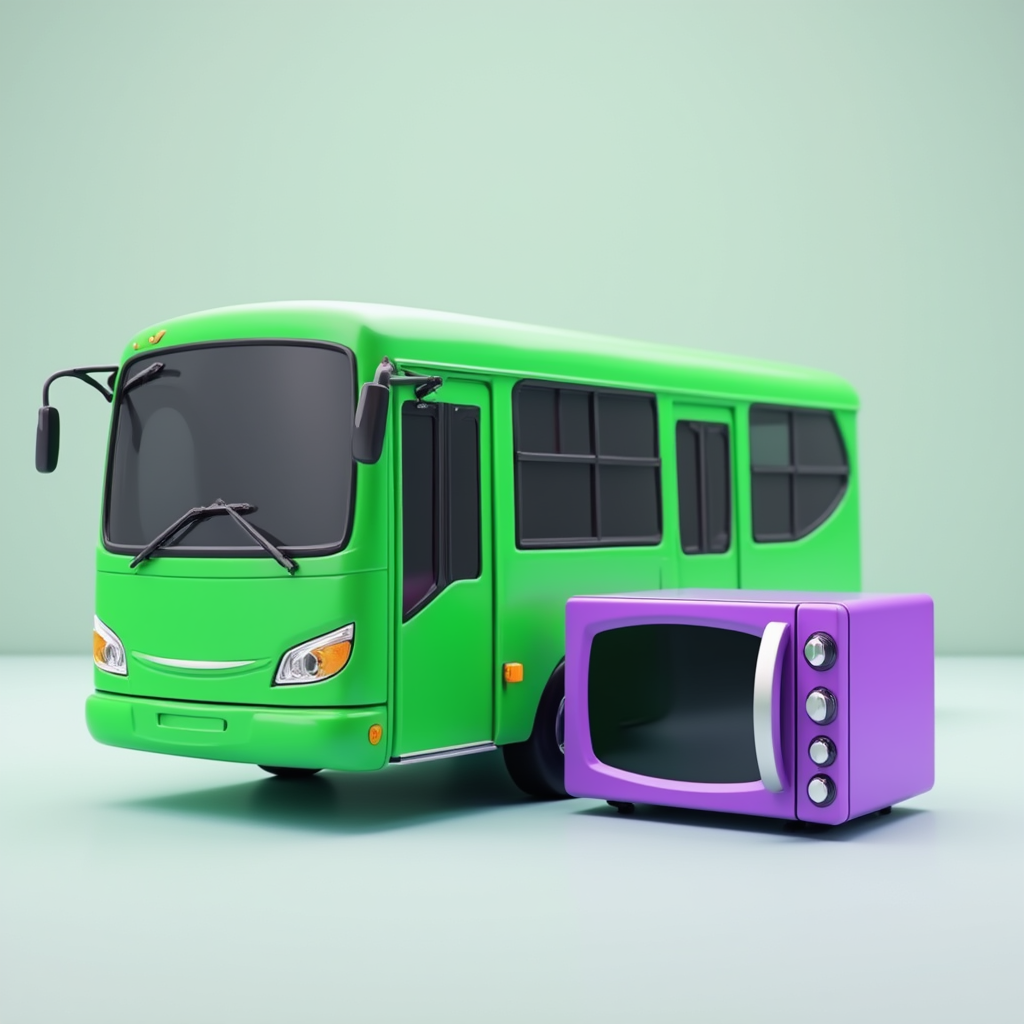

Thinking correctness:
(True, '')

-----------------------------------



In [10]:
random.seed(26)


# selected_range = range(0, 80) # single object
# selected_range = range(80, 179) # two objects
# selected_range = range(179, 259) # counting
# selected_range = range(259, 353) # colors
# selected_range = range(353, 453) # position
selected_range = range(453, 553) # color attribution

# indices = random.sample(selected_range, 10)

j = 1
num_examples = 1
indices = selected_range[num_examples*j:(num_examples*j)+num_examples]
# indices = selected_range

for i in indices:
   original_prompt = "outputs_with_thinking_short/images/00{}/metadata.jsonl".format(str(i).zfill(3))
   rewrite_text = "outputs_without_thinking_1_sample/images/00{}/metadata.jsonl".format(str(i).zfill(3))
   rewrite_image = "outputs_without_thinking_1_sample/images/00{}/samples/00000.png".format(str(i).zfill(3))
   thinking_text = "outputs_with_thinking_short/images/00{}/samples/00000.txt".format(str(i).zfill(3))
   thinking_image = "outputs_with_thinking_short/images/00{}/samples/00000.png".format(str(i).zfill(3))
   
   # if not (not rewrite_results[i][0] and not thinking_results[i][0]):
   #  continue

   print(i)
   print("Original prompt:")
   print(read_file(original_prompt))
   print()
  
   # print("Rewritten prompt:")
   # print(read_file(rewrite_text))
   # print()

   # print("Rewritten image:")
   # display(Image(filename=rewrite_image, width=300))

   # print("Rewritten correctness:")
   # print(rewrite_results[i])

   # print()
   # print("-----------------------------------")
   # print()

   print("Thought:")
   print(read_file(thinking_text)[1])
   print()

   print("Thinking image:")
   display(Image(filename=thinking_image, width=300))

   print("Thinking correctness:")
   print(thinking_results[i])

   print()
   print("-----------------------------------")
   print()

